# TMA pancreatic SALL4A

## Connect to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "drive/My Drive/Pancreatic SALL4A"

/content/drive/.shortcut-targets-by-id/1c-8L-weCLz2tpABT91SfWStlgslG_dnA/Pancreatic SALL4A


In [ ]:
!ls

5c	pan-1b	pan-2a	pan-2c	pan-3b	pan-4ab  pan-5ab
pan-1a	pan-1c	pan-2b	pan-3a	pan-3c	pan-4c	 pan-5c


## Libraries

In [ ]:
!pip install openslide-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for openslide-python: filename=openslide_python-1.3.0-cp310-cp310-linux_x86_64.whl size=33546 sha256=686bd7bcadaaac30297865358fa572645468f693258ccfbbfea340879cce5de3
  Stored in directory: /root/.cache/pip/wheels/4d/a0/e6/e94ffceb76b28f1be2f59303ad58fdcf11822caa64960ed352
Successfully built openslide-python


In [ ]:
!sudo apt-get install libopenslide0

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libopenslide0
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 89.8 kB of archives.
After this operation, 223 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libopenslide0 amd64 3.4.1+dfsg-5build1 [89.8 kB]
Fetched 89.8 kB in 1s (70.2 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libopenslide0.
(Reading database ... 120895 

In [ ]:
import openslide
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import re

from tqdm import tqdm
from PIL import Image
from os import listdir
from os.path import isfile, join

## Utils

In [ ]:
def plot_image(path, width = 3000, height = 3000):
  slide = openslide.OpenSlide(path)
  level = 0
  x, y = 0, 0
  image_data = slide.read_region((x, y), level, (width, height))
  image_np = np.array(image_data)
  plt.imshow(image_np)

## Load dataset

In [ ]:
IMAGE_PATH = './'

In [ ]:
image_paths = []
for root, dirs, files in os.walk(IMAGE_PATH):
     for file in files:
        image_paths.append(os.path.join(root, file))

In [ ]:
data_info = []

for image_path in tqdm(image_paths):
  slide = openslide.OpenSlide(image_path)
  width = slide.dimensions[0]
  height = slide.dimensions[1]
  level_count = slide.level_count
  levels = slide.level_dimensions
  properties = slide.properties
  slide_info_dict = {
      'path': image_path,
      'width': width,
      'height': height,
      'level_count': level_count,
      'levels': levels,
  }
  data_info.append(slide_info_dict)



100%|██████████| 518/518 [12:01<00:00,  1.39s/it]


In [ ]:
data_info_pdf = pd.DataFrame(data_info)
data_info_pdf.head()

,path,width,height,level_count,levels
0,./5c/pan 5c-4x.svs,9600,10368,3,"((9600, 10368), (2400, 2592), (600, 648))"
1,./5c/11.svs,8640,9984,3,"((8640, 9984), (2160, 2496), (540, 624))"
2,./5c/12.svs,6336,4992,3,"((6336, 4992), (1584, 1248), (396, 312))"
3,./5c/13.svs,5952,6144,3,"((5952, 6144), (1488, 1536), (372, 384))"
4,./5c/14.svs,6336,6336,3,"((6336, 6336), (1584, 1584), (396, 396))"


In [ ]:
data_info_pdf['folder'] = data_info_pdf['path'].apply(
    lambda x: ''.join(x.split('./')[1].split('/')[0])
)

data_info_pdf.head()

,path,width,height,level_count,levels,folder
0,./5c/pan 5c-4x.svs,9600,10368,3,"((9600, 10368), (2400, 2592), (600, 648))",5c
1,./5c/11.svs,8640,9984,3,"((8640, 9984), (2160, 2496), (540, 624))",5c
2,./5c/12.svs,6336,4992,3,"((6336, 4992), (1584, 1248), (396, 312))",5c
3,./5c/13.svs,5952,6144,3,"((5952, 6144), (1488, 1536), (372, 384))",5c
4,./5c/14.svs,6336,6336,3,"((6336, 6336), (1584, 1584), (396, 396))",5c


In [ ]:
data_info_pdf['Number'] = data_info_pdf['path'].apply(
    lambda x: str(''.join(x.split('/')[2].split('.svs')[0])))
data_info_pdf['Number'] = pd.to_numeric(
    data_info_pdf['Number'], errors='coerce').fillna(0)
data_info_pdf['number'] = data_info_pdf.Number
data_info_pdf.head()

,path,width,height,level_count,levels,folder,Number,number
0,./5c/pan 5c-4x.svs,9600,10368,3,"((9600, 10368), (2400, 2592), (600, 648))",5c,0.0,0.0
1,./5c/11.svs,8640,9984,3,"((8640, 9984), (2160, 2496), (540, 624))",5c,11.0,11.0
2,./5c/12.svs,6336,4992,3,"((6336, 4992), (1584, 1248), (396, 312))",5c,12.0,12.0
3,./5c/13.svs,5952,6144,3,"((5952, 6144), (1488, 1536), (372, 384))",5c,13.0,13.0
4,./5c/14.svs,6336,6336,3,"((6336, 6336), (1584, 1584), (396, 396))",5c,14.0,14.0


### Scores

In [ ]:
SCORE_PATH = '/content/drive/MyDrive/scores'

In [ ]:
score_paths = []
for root, dirs, files in os.walk(SCORE_PATH):
     for file in files:
        score_paths.append(os.path.join(root, file))

In [ ]:
scores = []

for score_path in tqdm(score_paths):
  score_pdf = pd.read_csv(score_path)
  score_pdf['folder'] = ''.join(score_path.split('Pan - ')[1].split('.csv')[0])
  score_pdf['folder'] = score_pdf.folder.str.lower().apply(
    lambda x: 'pan-'+x.strip())
  score_pdf['Number'] = score_pdf.Number.fillna(0).astype('int')
  scores.append(score_pdf)

scores_pdf = pd.concat(scores, axis=0)

100%|██████████| 13/13 [00:09<00:00,  1.42it/s]


In [ ]:
scores_pdf = scores_pdf.drop('Unnamed: 7', axis=1)

In [ ]:
image_info = scores_pdf.merge(data_info_pdf, on=['Number', 'folder'], how='outer')
image_info.shape

(520, 14)

In [ ]:
len(scores_pdf[~scores_pdf['Nuclear H-Score'].isin(['#REF!', '#VALUE!'])].merge(data_info_pdf, on=['Number', 'folder'], how='inner').drop_duplicates())

271

## Missing Images

In [ ]:
image_info[image_info.number.isna()][['Number', 'folder']].drop_duplicates()

,Number,folder
94,22.0,pan-2a
105,39.0,pan-2a


## Missing H scores

In [ ]:
image_info['Nuclear H-Score'].unique()

array(['0', '#VALUE!', '210', '140', '240', '120', '40', '60', '90',
       '#REF!', '180', '270', '50', '20', '70', '300', '200', '30', '10',
       '100', '80', '150', nan], dtype=object)

In [ ]:
image_info[image_info['Nuclear H-Score'] == '#REF!']

,Number,Nuclear Intensity,Nuclear Precentage,Cytoplasmic Intensity,Cytoplasmic precentage,Nuclear H-Score,Cytoplasmic H-Score,folder,path,width,height,level_count,levels,number
24,51.0,missed,missed,missed,missed,#REF!,#VALUE!,pan-1b,./pan-1b/51.svs,6912.0,5376.0,3.0,"((6912, 5376), (1728, 1344), (432, 336))",51.0


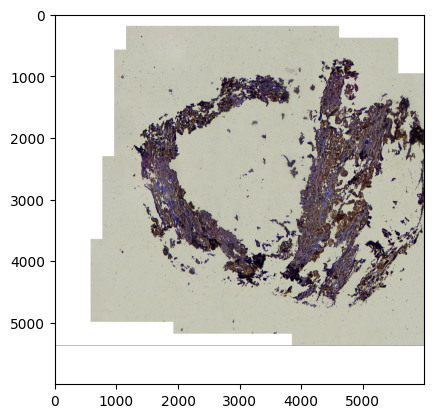

In [ ]:
plot_image('./pan-1b/51.svs', 6000, 6000)

In [ ]:
missing_score_paths = image_info[
    (image_info['Nuclear H-Score'].isna()) &
     (image_info['folder'] != '5c') &
      (image_info['Number'] != 0) &
        (image_info['width'] > 2000)
    ].path.unique()

missing_score_paths

array(['./pan-1a/87.svs', './pan-3b/38.svs', './pan-2b/64.svs',
       './pan-3c/39.svs', './pan-3c/64.svs', './pan-3c/73.svs',
       './pan-5ab/67.svs'], dtype=object)

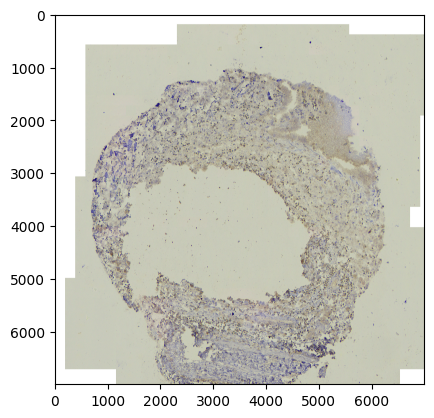

In [ ]:
plot_image('./pan-1a/87.svs', 7000, 7000)

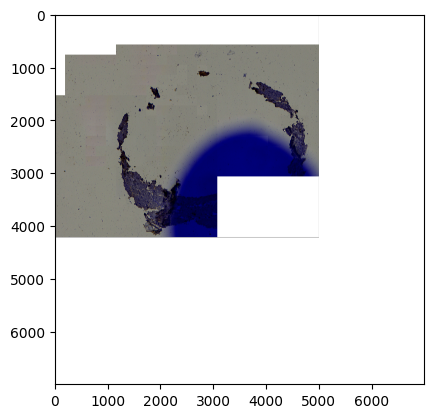

In [ ]:
plot_image('./pan-3b/38.svs', 7000, 7000)

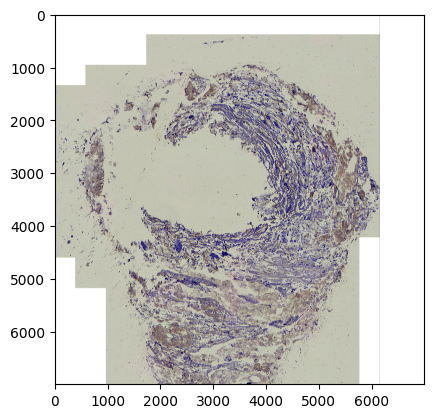

In [ ]:
plot_image('./pan-2b/64.svs', 7000, 7000)

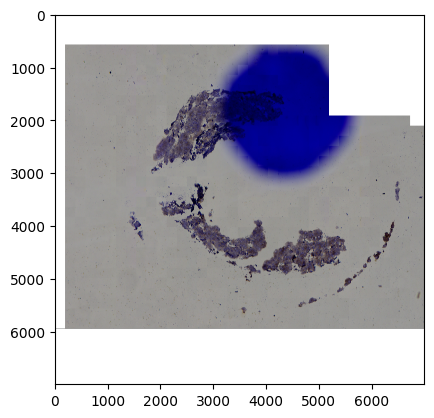

In [ ]:
plot_image('./pan-3c/39.svs', 7000, 7000)

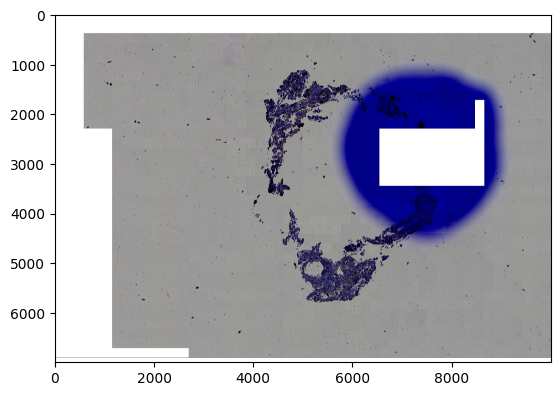

In [ ]:
plot_image('./pan-3c/64.svs', 10000, 7000)

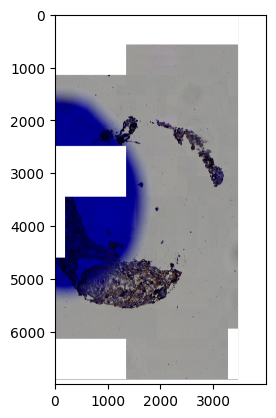

In [ ]:
plot_image('./pan-3c/73.svs', 4000, 7000)

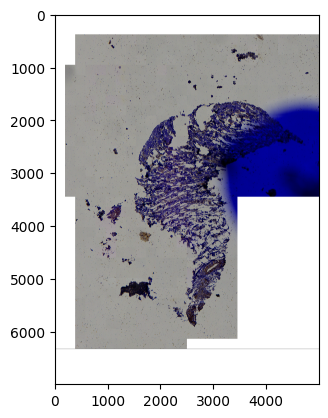

In [ ]:
plot_image('./pan-5ab/67.svs', 5000, 7000)

## H-score histograms

In [ ]:
image_info_clean = image_info[
     (~image_info['Nuclear H-Score'].isin(['#VALUE!', '#REF!'])) &
     (~image_info['Cytoplasmic H-Score'].isin(['#VALUE!', '#REF!']))
].dropna()

image_info_clean.shape

(269, 14)

In [ ]:
h_score_columns = [
  'Nuclear Intensity',
  'Nuclear Precentage',
  'Cytoplasmic Intensity',
  'Cytoplasmic precentage',
  'Nuclear H-Score',
  'Cytoplasmic H-Score'
]

for column in h_score_columns:
  image_info_clean[column] = image_info_clean[column].astype('int')

array([[<Axes: title={'center': 'Nuclear Intensity'}>,
        <Axes: title={'center': 'Nuclear Precentage'}>,
        <Axes: title={'center': 'Cytoplasmic Intensity'}>],
       [<Axes: title={'center': 'Cytoplasmic precentage'}>,
        <Axes: title={'center': 'Nuclear H-Score'}>,
        <Axes: title={'center': 'Cytoplasmic H-Score'}>],
       [<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'level_count'}>]], dtype=object)

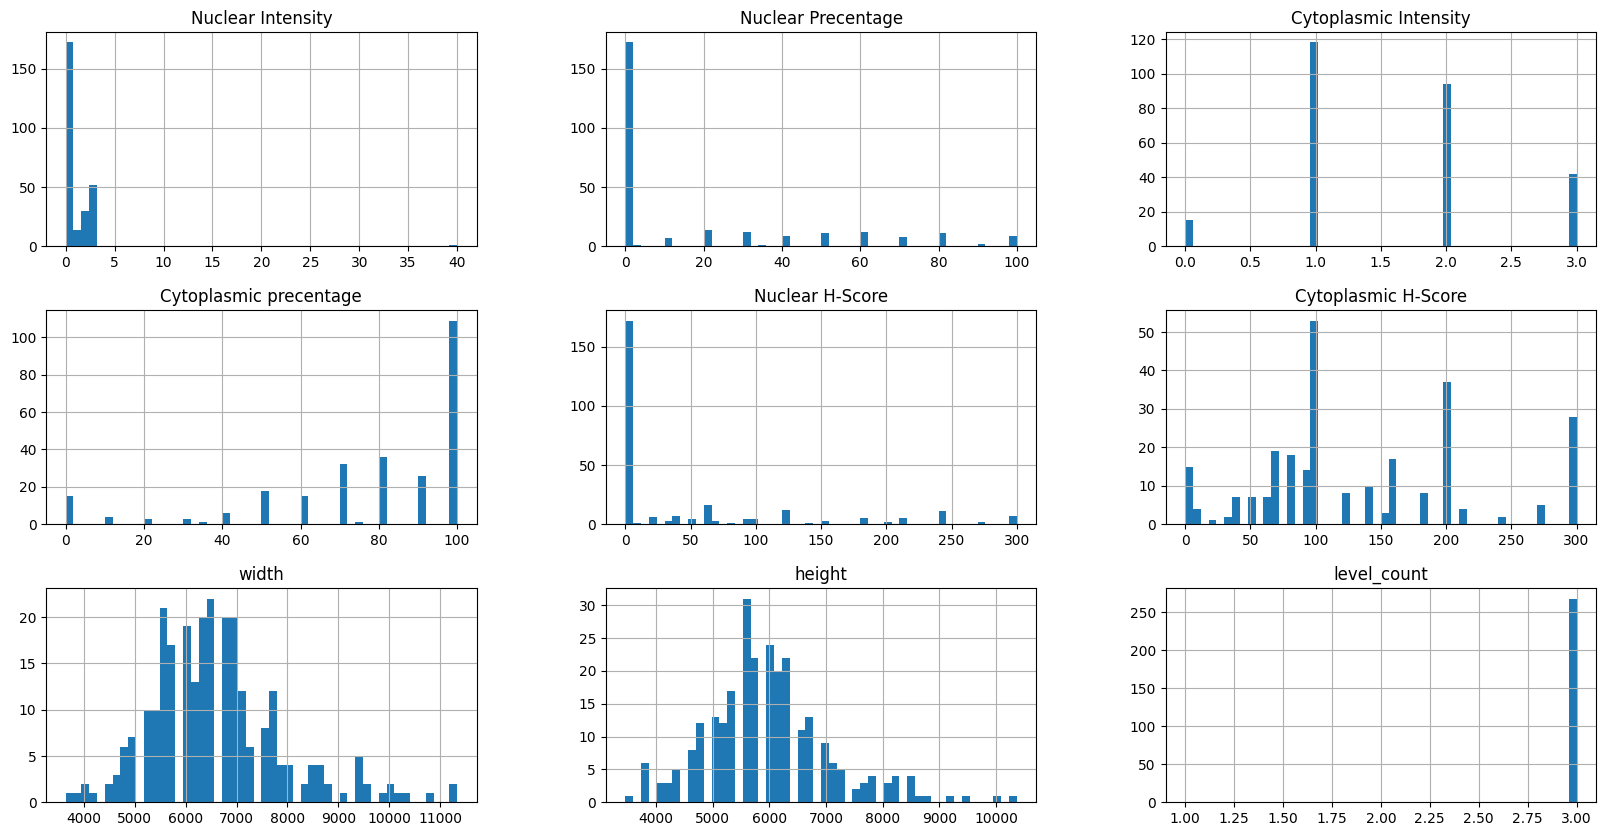

In [ ]:
image_info_clean.drop(['Number', 'number'], axis=1).hist(bins=50, figsize=(20, 10))

## Properties

In [ ]:
slide = openslide.OpenSlide('./5c/11.svs')
properties = slide.properties

properties

<_PropertyMap {'aperio.AppMag': '40', 'aperio.Date': '07/02/23', 'aperio.Filename': '11', 'aperio.Filtered': '5', 'aperio.Focus Offset': '0.0', 'aperio.ICC Profile': 'ScanScope v1', 'aperio.ImageID': '2001547', 'aperio.Left': '0.0', 'aperio.LineAreaXOffset': '0.0', 'aperio.LineAreaYOffset': '0.0', 'aperio.LineCameraSkew': '0.0', 'aperio.MPP': '0.173', 'aperio.OriginalWidth': '8640', 'aperio.Originalheight': '9984', 'aperio.Parmset': 'USM Filter', 'aperio.ScanScope ID': 'MVMWSI', 'aperio.StripeWidth': '2040', 'aperio.Time': '2:17:20 PM', 'aperio.Top': '0.0', 'aperio.User': 'b414003d-95c6-48b0-9369-8010ed517ba7', 'openslide.comment': 'Aperio Style Image\r\n8640x9984 [0,0 8640x9984] (192x192) JPEG/YCBCR Q=90|AppMag = 40|StripeWidth = 2040|ScanScope ID = MVMWSI|Filename = 11| Date = 07/02/23|Time = 2:17:20 PM|User = b414003d-95c6-48b0-9369-8010ed517ba7|Parmset = USM Filter|MPP = 0.173|Left = 0.0|Top = 0.0|LineCameraSkew = 0.0|LineAreaXOffset = 0.0|LineAreaYOffset = 0.0|Focus Offset = 0.0|I

In [ ]:
image_info_clean[
    (image_info_clean.folder == 'pan-3a') &
    (image_info_clean.Number == 42)
  ]

,Number,Nuclear Intensity,Nuclear Precentage,Cytoplasmic Intensity,Cytoplasmic precentage,Nuclear H-Score,Cytoplasmic H-Score,folder,path,width,height,level_count,levels,number


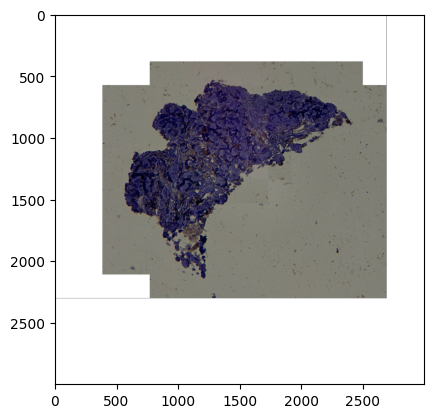

In [ ]:
plot_image('./pan-3a/42.svs', width=3000, height=3000)

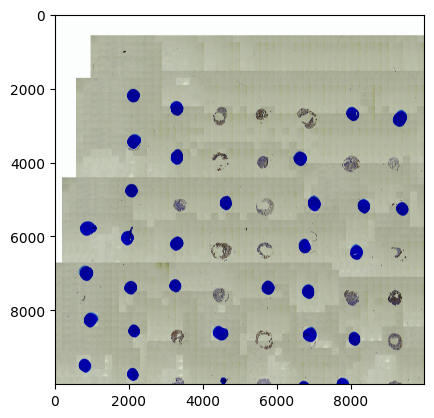

In [ ]:
plot_image('./pan-2c/pan-2c-4x.svs', width=10000, height=10000)